# Fashion MNIST classification: simple neural network
Classification of a subset of fashion MNIST images using a simple, densely-connected neural network.

To create conda environment: `conda create -n fmnist-nn python=3 jupyter keras tensorflow-mkl matplotlib scikit-learn numpy imageio pandas seaborn`

N.B. I used tensorflolw-mkl as I had no GPU available and a suitable Intel CPU.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # not used?
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
from keras.models import Sequential              # class of neural networks with one layer after the other
from keras.layers.core import Dense, Activation  # type of layers
from keras.optimizers import SGD                 # Optimisers, here the stochastic gradient descent 
from keras.utils import np_utils                 # extra tools

The data are stored in the numpy array file format. Load the data:

In [4]:
X_train = np.load("data/X_train.npy")
y_train = np.load("data/y_train.npy")
X_test =  np.load("data/X_test.npy")

In [5]:
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print(type(X_train[0,0,0]))

X_train shape:  (20000, 28, 28) y_train shape:  (20000,)
X_test shape:  (10, 28, 28)
<class 'numpy.float64'>


In [6]:
y_classes, y_class_counts = np.unique(y_train, return_counts=True)
print("y class values: ", y_classes, "\ny class counts", y_class_counts)

y class values:  [0. 1. 2. 3.] 
y class counts [5000 5000 5000 5000]


The target class is a value between 0-3.
Make text labels for the four classes:

In [7]:
LABELS = ["Sneaker", "Boot", "Shirt", "T-Shirt"]

Check how y classes are distributed across the rows:

Text(0.5, 1.0, 'distribution of y_train classes across rows')

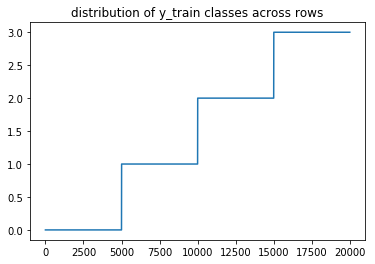

In [8]:
plt.plot(y_train)
plt.title("distribution of y_train classes across rows")

Reshape the images for use with keras:

In [9]:
X_train = X_train.reshape(20000, 784)
X_test = X_test.reshape(10, 784)

X_train /= 255.0 # normalising on (0,1)
X_test /= 255.0 # normalising on (0,1)

Instead of the 10 test images provided, create lots of test data from the training data using train_test_split. 

Stratify on the target class, because the y labels are not randomly ordered across rows.

In [10]:
images_train, images_test, labels_train, labels_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size = 0.1, random_state = 42)

Display some training images and labels:

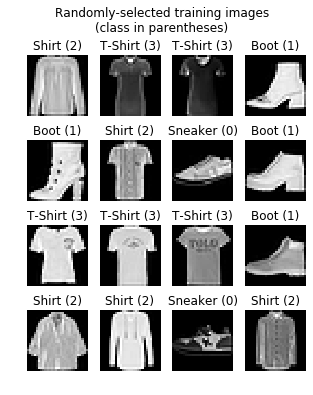

In [11]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("Randomly-selected training images\n(class in parentheses)")
for i in range(0,grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(images_train.shape[0]-grid_len)
    response = int(labels_train[image_index])
    sub_title = LABELS[response] + " (" + str(response) + ")"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(images_train[image_index].reshape(28, 28), cmap="gray")

Display some test images (no labels)

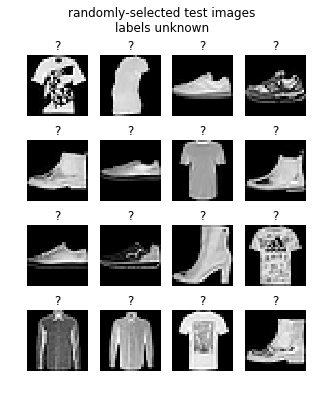

In [12]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("randomly-selected test images\nlabels unknown")
for i in range(0, grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(images_test.shape[0]-grid_len)
    sub_title = "?"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(images_test[image_index].reshape(28, 28), cmap="gray")

Convert each integer y class value (0-3) to an array of 4 categories (each with value 0-1):

In [13]:
labels_train.shape

(18000,)

In [14]:
nb_classes = 4
labels_train = np_utils.to_categorical(labels_train, nb_classes)
labels_test = np_utils.to_categorical(labels_test, nb_classes)

In [15]:
labels_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [16]:
labels_train.shape

(18000, 4)

Make a densely-connected neural network model with 3 layers (input, hidden, and output):

In [17]:
# First, declare a model with a sequential architecture
model = Sequential()

# Then add a first layer with 500 nodes and 784 inputs (the pixels of the image)
# and a 'relu' activation function to use on the nodes of that first layer
model.add(Dense(500,input_shape=(784,)))
model.add(Activation('relu'))

# Second hidden layer with 300 nodes
model.add(Dense(300))
model.add(Activation('relu'))

# Output layer with 4 categories (using softmax activation)
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

Use categorical_crossentropy loss function (for categorical outputs), and accuracy as the metric.

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=["accuracy"])

Select hyperparameters and fit the model:

Batch size should be large and divide into the training set size exactly (for speed), while still presenting a few tens of batches each epoch.

Show validation data output as well as training accuracy, because a neural network can easily converge to an overfitted solution that is excellent on the training set and rubbbish on the test set.

In [19]:
model.fit(images_train, labels_train,
          batch_size=200,
          epochs=20,
          verbose=2,
          validation_data = (images_test, labels_test))

Train on 18000 samples, validate on 2000 samples
Epoch 1/20
 - 1s - loss: 0.3080 - acc: 0.8762 - val_loss: 0.2133 - val_acc: 0.9085
Epoch 2/20
 - 1s - loss: 0.2226 - acc: 0.9052 - val_loss: 0.2008 - val_acc: 0.9150
Epoch 3/20
 - 1s - loss: 0.2056 - acc: 0.9113 - val_loss: 0.1931 - val_acc: 0.9130
Epoch 4/20
 - 1s - loss: 0.1951 - acc: 0.9158 - val_loss: 0.1847 - val_acc: 0.9170
Epoch 5/20
 - 1s - loss: 0.1746 - acc: 0.9225 - val_loss: 0.1930 - val_acc: 0.9195
Epoch 6/20
 - 1s - loss: 0.1715 - acc: 0.9242 - val_loss: 0.1877 - val_acc: 0.9235
Epoch 7/20
 - 1s - loss: 0.1746 - acc: 0.9223 - val_loss: 0.1763 - val_acc: 0.9275
Epoch 8/20
 - 1s - loss: 0.1629 - acc: 0.9265 - val_loss: 0.1787 - val_acc: 0.9250
Epoch 9/20
 - 1s - loss: 0.1632 - acc: 0.9294 - val_loss: 0.1840 - val_acc: 0.9180
Epoch 10/20
 - 1s - loss: 0.1482 - acc: 0.9367 - val_loss: 0.1861 - val_acc: 0.9230
Epoch 11/20
 - 1s - loss: 0.1397 - acc: 0.9384 - val_loss: 0.1904 - val_acc: 0.9150
Epoch 12/20
 - 1s - loss: 0.1363 - a

Save the model. This preserves it between notebook sessions, and training can also be continued on from the saved, partially-trained state (accuracy & validation will show if this is useful)

Manage the saved model filenames carefully to avoid overwriting different models etc.:

In [20]:
model.save('fmnist_simpleNN.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

Load the model, to show it works :-)

In [21]:
# returns a compiled model
# identical to the previous one
model = load_model('fmnist_simpleNN.h5')

Predict test image category probabilities:

In [22]:
y_probs = model.predict(images_test)

Rather than returning the category, these are probabilities of each category:

In [23]:
y_probs

array([[3.9742936e-08, 1.1919021e-07, 9.9999690e-01, 3.0004551e-06],
       [6.2455726e-08, 3.3070381e-07, 1.0898479e-03, 9.9890971e-01],
       [4.3660673e-08, 7.7095888e-07, 6.2298078e-02, 9.3770105e-01],
       ...,
       [4.5839062e-16, 7.9909995e-10, 9.9999952e-01, 4.4747438e-07],
       [1.3835091e-14, 3.5824208e-11, 9.9999952e-01, 4.2074470e-07],
       [9.9966776e-01, 3.2941607e-04, 3.5803515e-07, 2.5279664e-06]],
      dtype=float32)

Define a function to pick the most-probable category for each image:

In [24]:
def GetCorrectClass(y_pred):
    answers = np.zeros(len(y_pred), dtype=np.int)
    for idx, result in enumerate(y_pred):
        objectclass = np.argmax(result)
#         print(objectclass)
        answers[idx] = objectclass
    return answers

Get the most-probable classes for the predictions: 

In [25]:
y_pred = GetCorrectClass(y_probs)

Show a random set of test images with predicted labels:

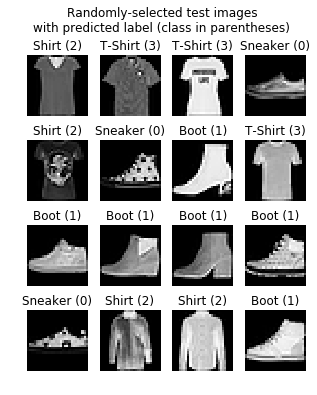

In [26]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("Randomly-selected test images\nwith predicted label (class in parentheses)")
for i in range(0, grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(images_test.shape[0]-grid_len)
    response = int(y_pred[image_index])
    sub_title = LABELS[response] + " (" + str(response) + ")"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(images_test[image_index].reshape(28, 28), cmap="gray")